## Análise de de ações do Ibov

O código tem o objetivo criar um banco de dados com o histórico das ações que compõem o Índice Bovespa a partir de 2015

## Importando bibliotecas

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Fazendo um webscrapy para baixar a listagem das ações que compõe o IBOV 

In [4]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_companhias_citadas_no_Ibovespa'
html = pd.read_html(url, match = 'Ação')
df = html[0]
df

,Código,Ação,Setor,Tipo,Site
0,ABEV3,AMBEV S/A,Consumo não Cíclico / Bebidas / Cervejas e Ref...,ON,http://ri.ambev.com.br
1,AZUL4,AZUL,Bens Industriais / Transporte / Transporte Aéreo,PN N2,https://www.voeazul.com.br/
2,B3SA3,B3,Financeiro e Outros / Serviços Financeiros Div...,ON NM,http://www.b3.com.br/
3,BBAS3,BANCO DO BRASIL,Financeiro e Outros / Intermediários Financeir...,ON ERJ NM,http://www.bb.com.br/
4,BBDC3,BRADESCO,Financeiro e Outros / Intermediários Financeir...,ON N1,http://www.bradesco.com.br/
...,...,...,...,...,...
70,VALE3,VALE,Materiais Básicos / Mineração / Minerais Metál...,ON NM,http://www.vale.com/
71,VIVT4,TELEF BRASIL,Telecomunicações,PN,http://www.telefonica.com.br/
72,VVAR3,VIAVAREJO,Consumo Cíclico / Comércio,ON NM,https://www.viavarejo.com.br/
73,WEGE3,WEG,Bens Industriais / Máquinas e Equipamentos,ON NM,https://www.weg.net/


## Incluir o índice Ibov para uma análise comparativa

In [5]:
tabela_ações = pd.DataFrame(df, columns=['Código', 'Ação', 'Setor', 'Tipo', 'Site'])
tabela_ações.columns

Index(['Código', 'Ação', 'Setor', 'Tipo', 'Site'], dtype='object')

In [6]:
bov = ['BOVA11', 'BOVESPA', 'Grupo Ações', 'Não info', 'https://ibovespa.com']

## Salvando a base de dados em uma planilha

In [7]:
tabela_ações=tabela_ações.append({'Código' : 'BOVA11', 'Ação' : 'BOVESPA', 'Setor' : 'Grupo Ações', 'Tipo' :  'Não info', 'Site': 'https://ibovespa.com'} , ignore_index=True)
tabela_ações
tabela_ações.to_csv('Empresas.csv', index=False)

## Criando uma lista com os códigos das ações para realizar a consulta dos dados históricos de fechamento

In [8]:
termo = ".SA"
lista = tabela_ações['Código'] + termo
lista

0      ABEV3.SA
1      AZUL4.SA
2      B3SA3.SA
3      BBAS3.SA
4      BBDC3.SA
        ...    
71     VIVT4.SA
72     VVAR3.SA
73     WEGE3.SA
74     YDUQ3.SA
75    BOVA11.SA
Name: Código, Length: 76, dtype: object

In [9]:
lista.to_csv('lista_ações.csv', index=False)

## Baixando os dados e salvando em um data frame

In [10]:
#Aqui pegaremos os valores de fechamento de cada ação presente no Ibov a partir de 2015
#Utilizaremos a lista com as ações
acoes_df = pd.DataFrame()
for acao in lista:
    acoes_df[acao] = yf.download(acao, start='2015-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRDT3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

## Limpeza dos dados

In [11]:
#Visualizando os valores de fechamento de cada ação
acoes_df.head(5)

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,...,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA,BOVA11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,12.145536,NaN,2.419612,15.050426,10.859241,11.956594,17.698751,7.934662,NaN,6.723982,...,NaN,10.619970,22.969917,4.266513,14.682981,NaN,NaN,5.216340,16.707977,47.259998
2015-01-05,11.925671,NaN,2.353460,14.738122,10.725386,11.980590,17.168079,7.558017,NaN,6.659612,...,NaN,10.293661,22.357807,4.008207,14.462181,NaN,NaN,5.251906,15.707772,46.320000
2015-01-06,12.380561,NaN,2.376358,14.944111,11.011400,12.374709,17.897022,7.449209,NaN,6.956696,...,NaN,9.649937,22.389547,4.204163,15.041773,NaN,NaN,5.174000,14.790917,46.580002
2015-01-07,12.554934,NaN,2.470497,15.601941,11.497617,12.866491,17.611280,7.943031,NaN,7.139897,...,NaN,9.581706,22.997124,4.453563,15.593764,NaN,NaN,5.114723,14.328698,48.150002
2015-01-08,13.311451,NaN,2.437421,15.655103,11.523038,12.932764,17.558792,7.909552,NaN,7.243877,...,NaN,9.804193,22.761347,4.230885,15.759365,NaN,NaN,5.201097,14.775762,48.509998


In [12]:
acoes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1781 entries, 2015-01-02 to 2022-03-04
Data columns (total 76 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   1781 non-null   float64
 1   AZUL4.SA   1218 non-null   float64
 2   B3SA3.SA   1781 non-null   float64
 3   BBAS3.SA   1781 non-null   float64
 4   BBDC3.SA   1781 non-null   float64
 5   BBDC4.SA   1781 non-null   float64
 6   BBSE3.SA   1781 non-null   float64
 7   BEEF3.SA   1781 non-null   float64
 8   BPAC11.SA  1248 non-null   float64
 9   BRAP4.SA   1781 non-null   float64
 10  BRDT3.SA   0 non-null      float64
 11  BRFS3.SA   1781 non-null   float64
 12  BRKM5.SA   1781 non-null   float64
 13  BRML3.SA   1781 non-null   float64
 14  BTOW3.SA   0 non-null      float64
 15  CCRO3.SA   1781 non-null   float64
 16  CIEL3.SA   1781 non-null   float64
 17  CMIG4.SA   1781 non-null   float64
 18  COGN3.SA   1781 non-null   float64
 19  CPFE3.SA   1781 non-null   flo

In [13]:
#Excluindo as informações faltantes
acoes_df.dropna(axis=1, inplace=True)

In [14]:
#salvando a base de dados
acoes_df.to_csv('acoes.csv')

## Importando base completa

In [15]:
acoes = pd.read_csv('acoes.csv')

In [16]:
#Defindo a data como index para facilitar a análise
acoes.index = pd.DatetimeIndex(acoes['Date'])
del acoes['Date']

In [17]:
acoes

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,...,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA,BOVA11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,12.145536,2.419612,15.050426,10.859241,11.956594,17.698751,7.934662,6.723982,60.129288,11.112411,...,13.981677,7.811145,18.598099,9.010094,10.619970,4.266513,14.682981,5.216340,16.707977,47.259998
2015-01-05,11.925671,2.353460,14.738122,10.725386,11.980590,17.168079,7.558017,6.659612,58.988197,10.442221,...,13.981677,7.650554,18.598099,8.976632,10.293661,4.008207,14.462181,5.251906,15.707772,46.320000
2015-01-06,12.380561,2.376358,14.944111,11.011400,12.374709,17.897022,7.449209,6.956696,59.520061,10.218823,...,13.940065,7.464268,18.598099,8.990973,9.649937,4.204163,15.041773,5.174000,14.790917,46.580002
2015-01-07,12.554934,2.470497,15.601941,11.497617,12.866491,17.611280,7.943031,7.139897,62.179371,10.212440,...,14.231352,7.444999,18.598099,9.005311,9.581706,4.453563,15.593764,5.114723,14.328698,48.150002
2015-01-08,13.311451,2.437421,15.655103,11.523038,12.932764,17.558792,7.909552,7.243877,61.067295,10.237971,...,14.281283,7.335796,18.598099,9.091352,9.804193,4.230885,15.759365,5.201097,14.775762,48.509998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,14.840000,14.700000,34.196190,16.992802,20.231119,22.900000,10.800000,29.000000,17.340000,46.799999,...,40.220001,36.169998,53.930000,39.869999,32.820000,14.250000,87.540001,29.320000,22.000000,107.480003
2022-02-25,15.200000,14.580000,34.748852,17.042751,20.331026,23.040001,10.810000,30.120001,16.709999,47.730000,...,41.410000,34.590000,55.070000,39.360001,33.049999,14.710000,92.279999,29.400000,21.250000,108.900002
2022-03-02,14.520000,14.320000,35.133743,16.902893,20.121222,23.090000,11.100000,32.090000,16.520000,47.130001,...,41.790001,34.509998,55.000000,40.049999,33.349998,15.370000,99.650002,30.250000,20.590000,111.099998


In [18]:
#Normalizando os dados para ter os valores de retornos dos investimentos
acoes_normalizado = acoes.copy()
for i in acoes_normalizado.columns:
  acoes_normalizado[i] = acoes_normalizado[i] / acoes_normalizado[i][0]

In [19]:
acoes_normalizado

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,...,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA,BOVA11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.981897,0.972660,0.979250,0.987674,1.002007,0.970016,0.952532,0.990427,0.981023,0.939690,...,1.000000,0.979441,1.000000,0.996286,0.969274,0.939457,0.984962,1.006818,0.940136,0.980110
2015-01-06,1.019351,0.982124,0.992936,1.014012,1.034969,1.011203,0.938819,1.034610,0.989868,0.919587,...,0.997024,0.955592,1.000000,0.997878,0.908659,0.985386,1.024436,0.991883,0.885261,0.985612
2015-01-07,1.033708,1.021030,1.036645,1.058786,1.076100,0.995058,1.001055,1.061856,1.034095,0.919012,...,1.017857,0.953125,1.000000,0.999469,0.902235,1.043841,1.062030,0.980520,0.857596,1.018832
2015-01-08,1.095995,1.007360,1.040177,1.061127,1.081643,0.992092,0.996835,1.077320,1.015600,0.921310,...,1.021428,0.939145,1.000000,1.009019,0.923185,0.991649,1.073308,0.997078,0.884354,1.026449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,1.221848,6.075354,2.272108,1.564824,1.692047,1.293877,1.361117,4.312921,0.288379,4.211507,...,2.876622,4.630563,2.899759,4.425037,3.090404,3.339964,5.962004,5.620800,1.316736,2.274228
2022-02-25,1.251489,6.025760,2.308829,1.569424,1.700403,1.301787,1.362377,4.479489,0.277901,4.295198,...,2.961733,4.428288,2.961055,4.368434,3.112061,3.447780,6.284827,5.636136,1.271848,2.304274
2022-03-02,1.195501,5.918304,2.334402,1.556545,1.682856,1.304612,1.398925,4.772470,0.274741,4.241204,...,2.988912,4.418046,2.957292,4.445015,3.140310,3.602473,6.786769,5.799086,1.232345,2.350825


Até aqui foram feitos tratamentos e configurações para que os dados estejam corretos e limpos para a análise.
Também criamos duas bases de dados, uma com o histórico dos preços das açõe e a outra com os retornos desses investimentos ao longo do tempo.
A seguir faremos as análises e visualizações com essas bases de dados

## Visualização e análise dos dados

### Analisando os dados dos últimos 7 anos de análise

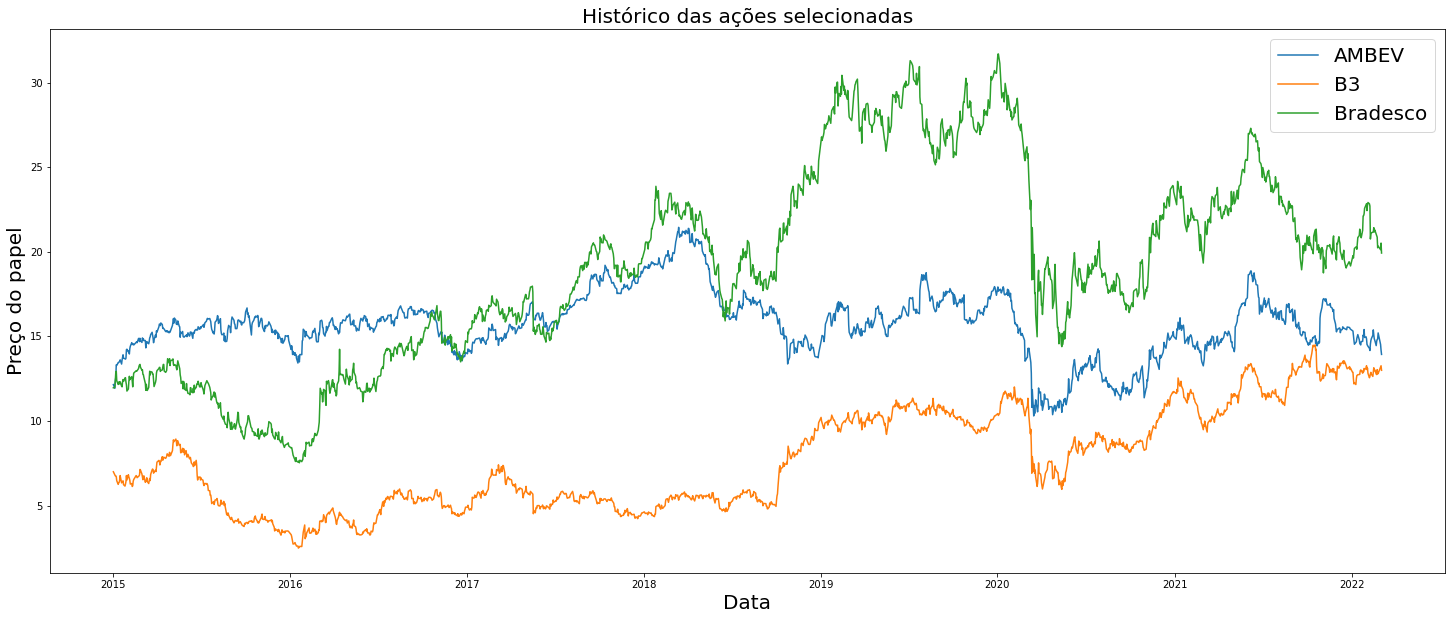

In [20]:
#Plotando os preços dos papeis das ações ABEV3, B3SA3, CMIG4 para usarmos como exemplo
plt.figure(figsize=(25, 10))
plt.plot(acoes.index, acoes['ABEV3.SA'], label='AMBEV') 
plt.plot(acoes.index, acoes['CMIG4.SA'], label='B3')
plt.plot(acoes.index, acoes['BBDC4.SA'], label='Bradesco') 
plt.xlabel('Data', fontsize=20)
plt.ylabel('Preço do papel', fontsize=20)
plt.title("Histórico das ações selecionadas", fontsize=20)
plt.legend(fontsize=20);

In [21]:
#Vamos criar uma linha na horizontal para comparar os investimentos
#Para um retono de 0% temos:
ret_zero = 1
acoes_normalizado['ret_zero'] = ret_zero

#Para um retorno de 50% temos:
ret_um = 1.5
acoes_normalizado['ret_1'] = ret_um

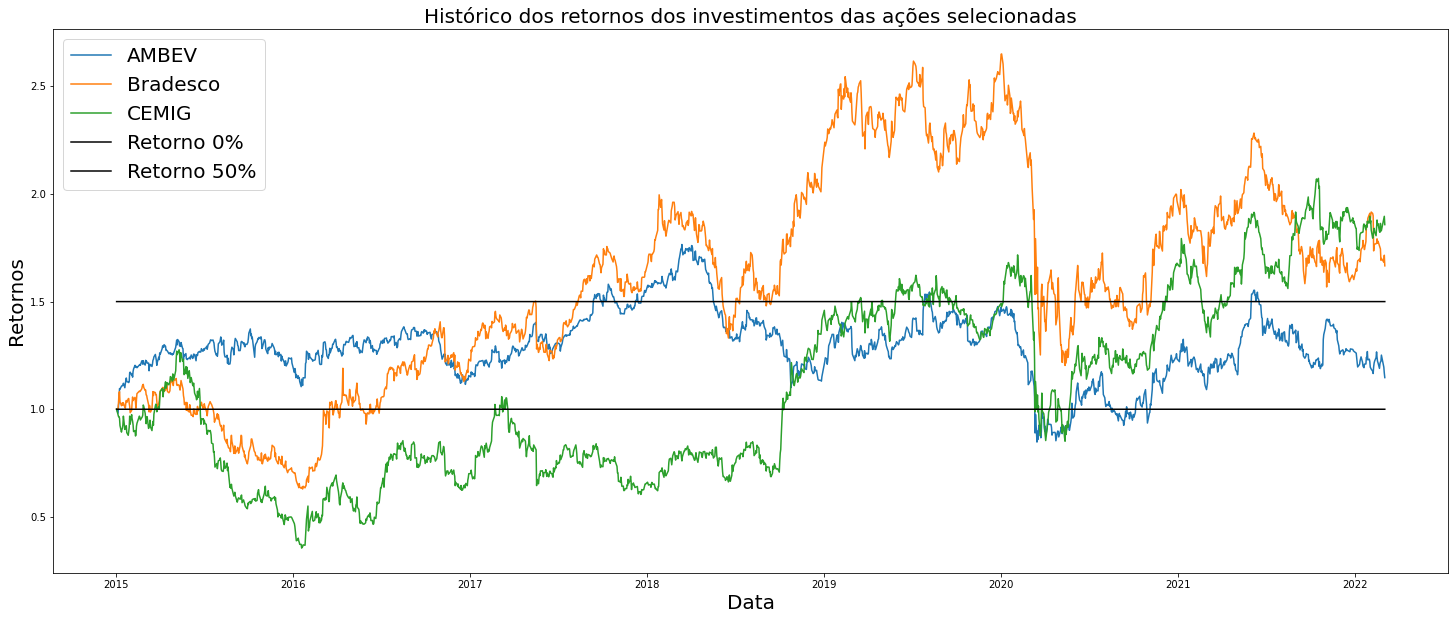

In [22]:
#Plotando os retornos dos investimentos das ações selecionadas
plt.figure(figsize=(25, 10))
plt.plot(acoes_normalizado.index, acoes_normalizado['ABEV3.SA'], label='AMBEV')  # Plot some data on the (implicit) axes.
plt.plot(acoes_normalizado.index, acoes_normalizado['BBDC4.SA'], label='Bradesco')   # etc.
plt.plot(acoes_normalizado.index, acoes_normalizado['CMIG4.SA'], label='CEMIG') 
plt.plot(acoes_normalizado.index, acoes_normalizado['ret_zero'], label='Retorno 0%', color = 'black') 
plt.plot(acoes_normalizado.index, acoes_normalizado['ret_1'], label='Retorno 50%', color = 'black') 
plt.xlabel('Data', fontsize=20)
plt.ylabel('Retornos', fontsize=20)
plt.title("Histórico dos retornos dos investimentos das ações selecionadas", fontsize=20)
plt.legend(fontsize=20);

As linhas pretas no gráfico sinalizam pontos de investimento para uma melhor visualização.
A linha preta mais abaixo indica um retorno de 0% e a linha superior indica um retorno no investimento de 50%

### Análise das melhores e piores ações

Conseguimos até o momento obter, tratar e visualizar os dados das ações que compõem o Ibov.
Mas quais são as ações que tiveram os maiores e os piores retornos de investimentos?

In [27]:
#Selecionando o último dia últil do mês para verificar quais as ações com os melhores retornos e transpondo a tabela para melhorar a análise
melhores_acoes = acoes_normalizado[len(acoes_normalizado)-1:]
melhores_acoes = melhores_acoes.T

#Verificando quais os maiores retornos durante o período estudado
melhores_acoes.sort_values(ascending = False, by = '2022-03-04').head(10)

#OBS: no comando acima na parte "by = " temos que colocar o dia que o código foi rodado. 
#Pois se trata do último dia últil de negociação

Date,2022-03-04
MGLU3.SA,29.220678
ELET3.SA,7.558157
CSNA3.SA,7.515208
VALE3.SA,6.944775
ELET6.SA,6.066491
WEGE3.SA,6.040634
B3SA3.SA,5.967899
RENT3.SA,5.525157
PETR3.SA,5.367572
EQTL3.SA,5.308813


Na tabela acima temos os maiores valores de retorno do período estudado.
Agora vamos plotar os gráficos para entender como se comportou essas ações ao longo do tempo.

OBS: As ações da MGLU3.SA não entrará no nosso gráfico, pois suas informações acabam por prejudicando a visualização do gráfico

In [28]:
#PLotando a linha de 500% para fins de comparação
ret_5 = 6
acoes_normalizado['ret_5'] = ret_5

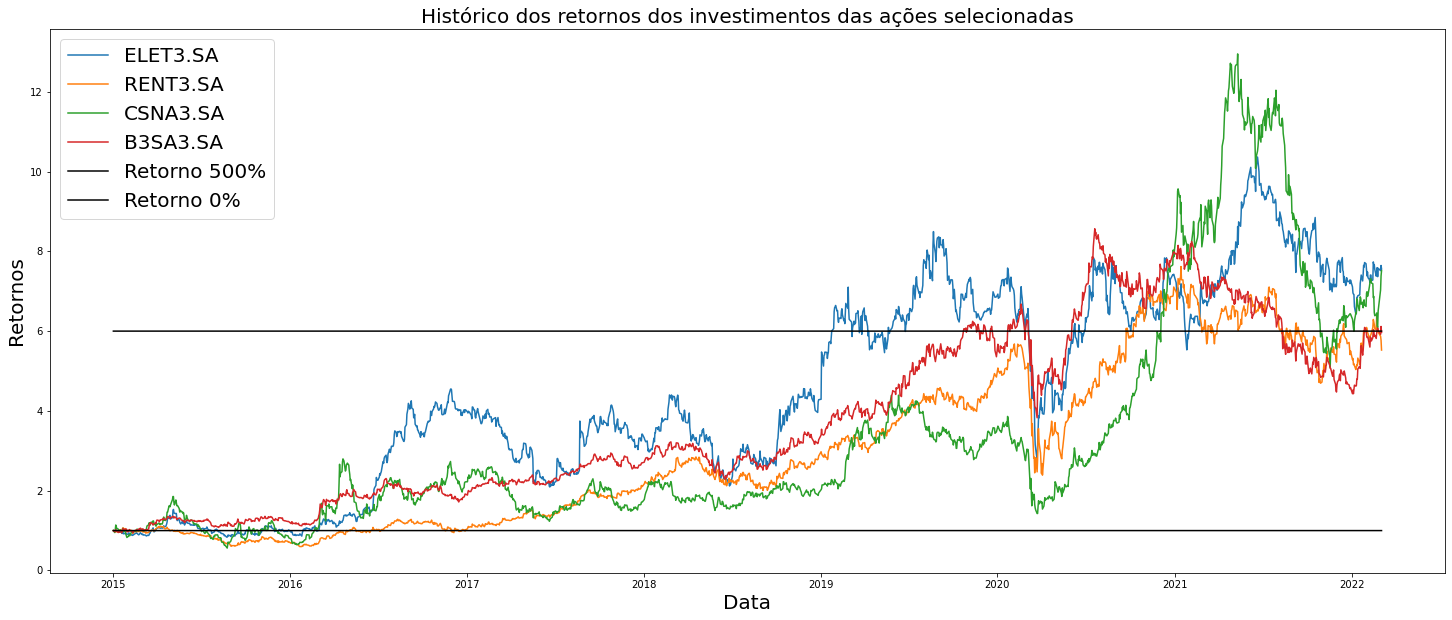

In [29]:
#Plotando os retornos dos investimentos das ações selecionadas
plt.figure(figsize=(25, 10))
plt.plot(acoes_normalizado.index, acoes_normalizado['ELET3.SA'], label='ELET3.SA')  # Plot some data on the (implicit) axes.
plt.plot(acoes_normalizado.index, acoes_normalizado['RENT3.SA'], label='RENT3.SA')   # etc.
plt.plot(acoes_normalizado.index, acoes_normalizado['CSNA3.SA'], label='CSNA3.SA') 
plt.plot(acoes_normalizado.index, acoes_normalizado['B3SA3.SA'], label='B3SA3.SA') 
plt.plot(acoes_normalizado.index, acoes_normalizado['ret_5'], label='Retorno 500%', color = 'black') 
plt.plot(acoes_normalizado.index, acoes_normalizado['ret_zero'], label='Retorno 0%', color = 'black') 
plt.xlabel('Data', fontsize=20)
plt.ylabel('Retornos', fontsize=20)
plt.title("Histórico dos retornos dos investimentos das ações selecionadas", fontsize=20)
plt.legend(fontsize=20);

Se tratando das ações com os maiores retornos as linhas de referência ficam:
 - A linha inferior indica um retorno de 0%
 - A linha superior indica um retorno no investimento de 500%

In [31]:
#Verificando as ações com os piores retornos
melhores_acoes = acoes_normalizado[len(acoes_normalizado)-1:]
piores_acoes = melhores_acoes.T

#Verificando e ordenando os piores valores
piores_acoes.sort_values(ascending = True, by = '2022-03-04').head(10)

#OBS: no comando acima na parte "by = " temos que colocar o dia que o código foi rodado. 
#Pois se trata do último dia últil de negociação

Date,2022-03-04
CIEL3.SA,0.148905
COGN3.SA,0.165333
BRFS3.SA,0.256614
PCAR3.SA,0.355745
EMBR3.SA,0.686076
ECOR3.SA,0.725192
QUAL3.SA,0.772878
CVCB3.SA,0.807443
GOLL4.SA,0.991328
BRML3.SA,0.997934


Acima temos os piores retornos de investimentos ao longo do período estudado.
Logo abaixo plotaremos os dados com essas informações

In [32]:
acoes_normalizado['ret_05'] = 0.50
acoes_normalizado['ret_02'] = 0.20

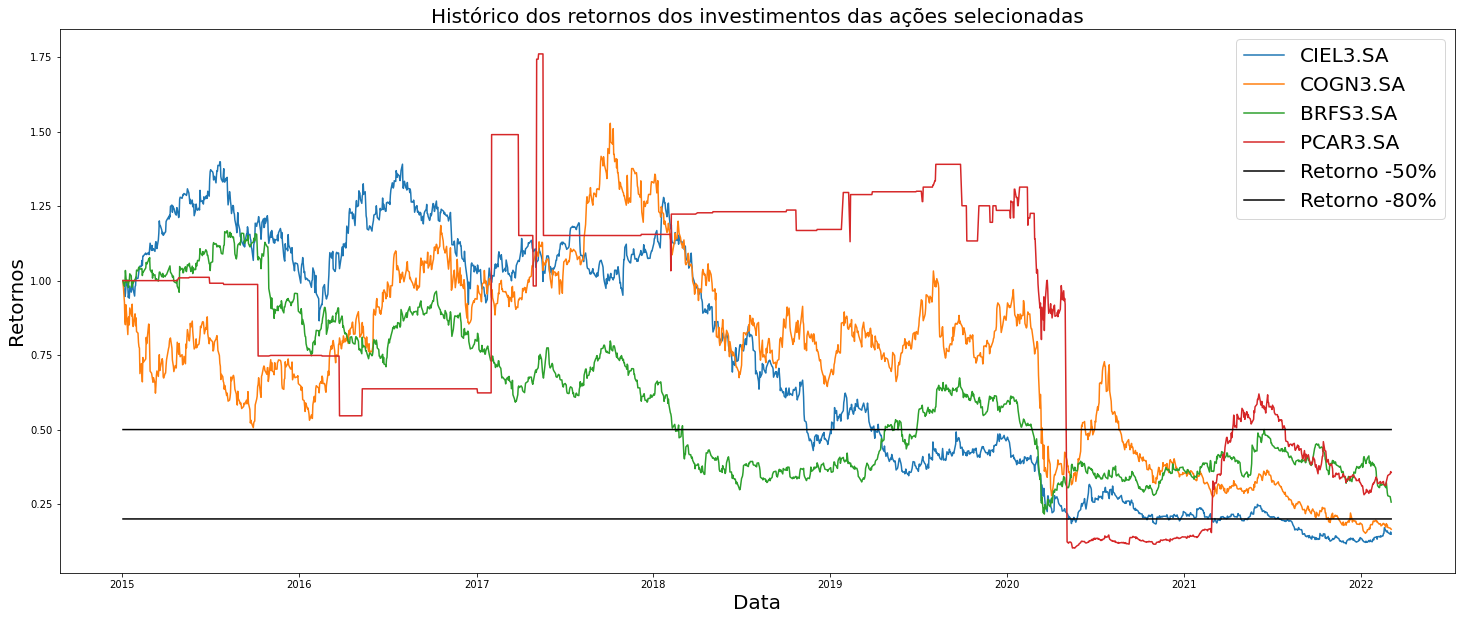

In [33]:
#Plotando os retornos dos investimentos das ações selecionadas
plt.figure(figsize=(25, 10))
plt.plot(acoes_normalizado.index, acoes_normalizado['CIEL3.SA'], label='CIEL3.SA')  # Plot some data on the (implicit) axes.
plt.plot(acoes_normalizado.index, acoes_normalizado['COGN3.SA'], label='COGN3.SA')   # etc.
plt.plot(acoes_normalizado.index, acoes_normalizado['BRFS3.SA'], label='BRFS3.SA') 
plt.plot(acoes_normalizado.index, acoes_normalizado['PCAR3.SA'], label='PCAR3.SA') 
plt.plot(acoes_normalizado.index, acoes_normalizado['ret_05'], label='Retorno -50%', color = 'black') 
plt.plot(acoes_normalizado.index, acoes_normalizado['ret_02'], label='Retorno -80%', color = 'black')
plt.xlabel('Data', fontsize=20)
plt.ylabel('Retornos', fontsize=20)
plt.title("Histórico dos retornos dos investimentos das ações selecionadas", fontsize=20)
plt.legend(fontsize=20);

Até esse momento trabalhamos com as ações do Ibov com o período de 7 anos.

Verificamos ao longo desse tempo tivemos as ações que mais tiveram retornos como MGLU3.SA, ELET3.SA e CSNA3.SA, com destaque para a MGLU3 que multiplicou o valor de suas ações em mais de 27 vezes.

Verificamos também os piores retornos como da CIEL3.SA e da COGN3.SA que tiveramos valores de suas ações reduzidas em mais de 80% de seu valor inicial.

Na próxima etapa faremos essas mesmas análises nos últimos 12 meses.

## Analisando as ações dos últimos 12 meses

### Analisando as ações com os melhores retornos

In [34]:
#Filtrando os dados
df_mask=acoes.index >= "2021-01-01"
acoes2 = acoes[df_mask]
acoes2

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,...,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA,BOVA11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.827890,19.180500,34.434223,20.397017,22.916546,27.130730,9.044785,43.768806,21.480000,20.664057,...,42.164333,39.791012,58.215294,29.443165,27.485811,13.795488,77.746445,36.632359,33.465923,114.089996
2021-01-05,15.143991,19.218245,34.076973,20.299498,22.776823,26.623011,8.864609,44.624439,21.309999,20.672907,...,42.065262,39.660641,57.948479,29.496696,27.357094,13.943232,79.055534,38.880764,33.633251,114.690002
2021-01-06,15.450509,18.903709,34.855610,20.809797,23.531717,26.189140,8.738486,46.730610,21.250000,21.478230,...,41.857212,38.822544,56.891098,29.550228,26.060034,14.617308,81.648216,39.911690,32.294621,115.550003
2021-01-07,15.373879,19.432129,36.238838,21.320091,24.156448,26.743017,8.693442,50.271599,21.930000,22.009212,...,41.827496,38.371616,61.753078,28.684780,25.990725,15.319085,86.978088,41.561176,32.698177,118.370003
2021-01-08,15.833660,19.718359,36.449532,21.155760,23.948206,27.573832,8.765512,50.528290,21.980000,21.849916,...,43.214478,39.942001,62.039654,29.309328,27.723442,15.245214,86.706070,44.074680,33.810425,120.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,14.840000,14.700000,34.196190,16.992802,20.231119,22.900000,10.800000,29.000000,17.340000,46.799999,...,40.220001,36.169998,53.930000,39.869999,32.820000,14.250000,87.540001,29.320000,22.000000,107.480003
2022-02-25,15.200000,14.580000,34.748852,17.042751,20.331026,23.040001,10.810000,30.120001,16.709999,47.730000,...,41.410000,34.590000,55.070000,39.360001,33.049999,14.710000,92.279999,29.400000,21.250000,108.900002
2022-03-02,14.520000,14.320000,35.133743,16.902893,20.121222,23.090000,11.100000,32.090000,16.520000,47.130001,...,41.790001,34.509998,55.000000,40.049999,33.349998,15.370000,99.650002,30.250000,20.590000,111.099998


In [35]:
#Normalizando os dados para ter os valores de retornos dos investimentos
acoes_normalizado2 = acoes2.copy()
for i in acoes_normalizado2.columns:
  acoes_normalizado2[i] = acoes_normalizado2[i] / acoes_normalizado2[i][0]
acoes_normalizado2

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,...,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA,BOVA11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.021318,1.001968,0.989625,0.995219,0.993903,0.981286,0.980080,1.019549,0.992086,1.000428,...,0.997650,0.996724,0.995417,1.001818,0.995317,1.010710,1.016838,1.061378,1.005000,1.005259
2021-01-06,1.041990,0.985569,1.012237,1.020237,1.026844,0.965294,0.966135,1.067669,0.989292,1.039400,...,0.992716,0.975661,0.977253,1.003636,0.948127,1.059572,1.050186,1.089520,0.965000,1.012797
2021-01-07,1.036822,1.013119,1.052408,1.045255,1.054105,0.985709,0.961155,1.148571,1.020950,1.065096,...,0.992011,0.964329,1.060771,0.974242,0.945605,1.110442,1.118740,1.134548,0.977059,1.037514
2021-01-08,1.067830,1.028042,1.058526,1.037199,1.045018,1.016332,0.969123,1.154436,1.023277,1.057388,...,1.024906,1.003795,1.065693,0.995454,1.008646,1.105087,1.115242,1.203163,1.010294,1.055307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,1.000817,0.766403,0.993087,0.833102,0.882817,0.844061,1.194058,0.662572,0.807263,2.264802,...,0.953887,0.908999,0.926389,1.354134,1.194071,1.032946,1.125968,0.800385,0.657385,0.942063
2022-02-25,1.025095,0.760147,1.009137,0.835551,0.887177,0.849222,1.195164,0.688161,0.777933,2.309808,...,0.982110,0.869292,0.945971,1.336813,1.202439,1.066291,1.186935,0.802569,0.634974,0.954510
2022-03-02,0.979236,0.746592,1.020315,0.828694,0.878022,0.851064,1.227227,0.733171,0.769088,2.280772,...,0.991122,0.867281,0.944769,1.360248,1.213353,1.114132,1.281731,0.825773,0.615253,0.973793


In [37]:
#Selecionando o último dia últil do mês para verificar quais as ações com os melhores retornos e transpondo a tabela para melhorar a análise
melhores_acoes = acoes_normalizado2[len(acoes_normalizado2)-1:]
melhores_acoes = melhores_acoes.T

#Verificando quais os maiores retornos durante o período estudado
melhores_acoes.sort_values(ascending = False, by = '2022-03-04').head(10)

Date,2022-03-04
PCAR3.SA,2.550691
BRKM5.SA,2.293838
EMBR3.SA,1.962963
MRFG3.SA,1.760058
JBSS3.SA,1.722883
PETR3.SA,1.535466
PETR4.SA,1.456731
TAEE11.SA,1.403382
VALE3.SA,1.311571
GGBR4.SA,1.269095


Aqui vemos que a PCAR3.SA, BRKM5.SA e a EMBR3.SA ,ais que dobraram seus valores nos últimos 12 meses.
Outras ações de destaque foram a MRFG3.SA e a JBSS3.SA que cresceram aproximadamente 82% e 75% respectivamente

In [38]:
#PLotando a linha fins de comparação
#Para ações que tiveram 0% de retorno
ret_1 = 1
acoes_normalizado2['ret_1'] = ret_1

#Para as ações que tiveram 100% de retornos
ret_2 = 2
acoes_normalizado2['ret_2'] = ret_2

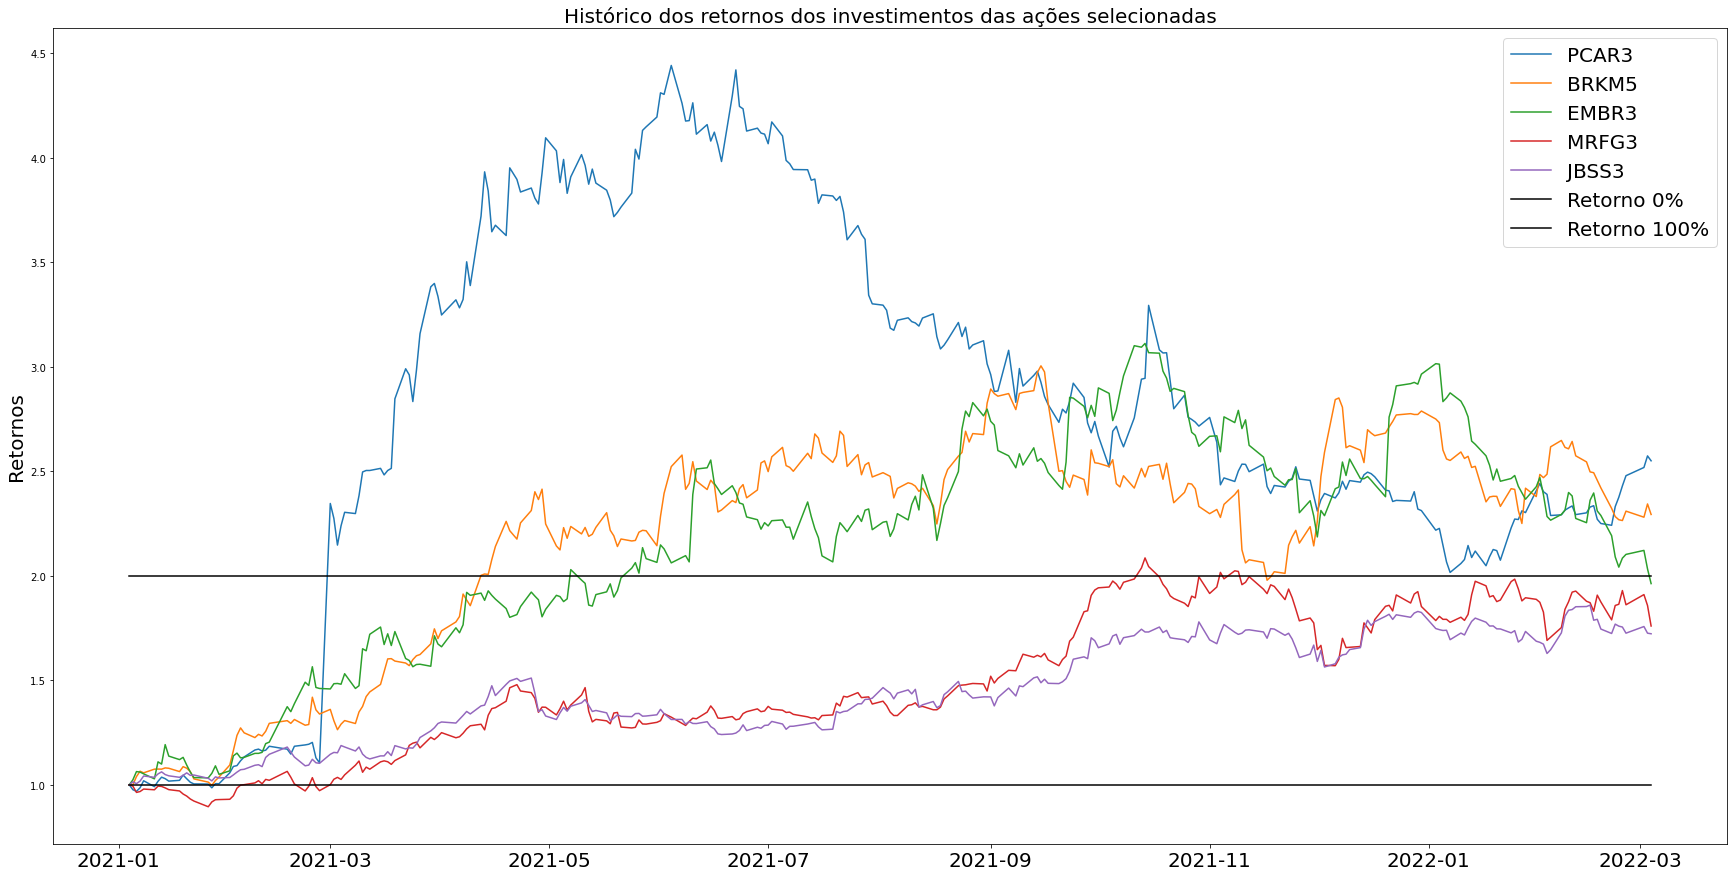

In [39]:
#Plotando os retornos dos investimentos das ações selecionadas
plt.figure(figsize=(30, 15))
plt.plot(acoes_normalizado2.index, acoes_normalizado2['PCAR3.SA'], label='PCAR3')  # Plot some data on the (implicit) axes.
plt.plot(acoes_normalizado2.index, acoes_normalizado2['BRKM5.SA'], label='BRKM5')   # etc.
plt.plot(acoes_normalizado2.index, acoes_normalizado2['EMBR3.SA'], label='EMBR3') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['MRFG3.SA'], label='MRFG3') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['JBSS3.SA'], label='JBSS3') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['ret_1'], label='Retorno 0%', color = 'black') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['ret_2'], label='Retorno 100%', color = 'black') 
#plt.xlabel('Data', fontsize=20)
plt.ylabel('Retornos', fontsize=20)
plt.xticks(fontsize = 20)
plt.title("Histórico dos retornos dos investimentos das ações selecionadas", fontsize=20)
plt.legend(fontsize=20);

No gráfico acima a linha preta inferior sinaliza um retorno de 0% e a linha superior um retorno de 100% do valor investido

### Analisando as ações com os piores retornos

In [95]:
#Selecionando o último dia últil do mês para verificar quais as ações com os melhores retornos e transpondo a tabela para melhorar a análise
piores_acoes = acoes_normalizado2[len(acoes_normalizado2)-1:]
piores_acoes = piores_acoes.T

#Verificando quais os maiores retornos durante o período estudado
piores_acoes.sort_values(ascending = True, by = '2022-02-22').head(10)

Date,2022-02-22
20%,0.200000
MGLU3.SA,0.241048
50%,0.500000
QUAL3.SA,0.511410
ECOR3.SA,0.518491
COGN3.SA,0.519149
CYRE3.SA,0.576155
SULA11.SA,0.624262
UGPA3.SA,0.648647
YDUQ3.SA,0.658879


Aqui a vemos as piores ações nos últimos 12 meses.
Destaque especial para a MGLU3.SA que nos últimos 7 anos multiplicou o seu valor de mercado em 27 vezes agora tem uma queda de mais de 75%. 

In [77]:
#PLotando a linha fins de comparação
ret_50pct = 0.5
acoes_normalizado2['50%'] = ret_50pct
ret_20pct = 0.2
acoes_normalizado2['25%'] = ret_25pct
ret_0 = 1
acoes_normalizado2['0%'] = ret_0

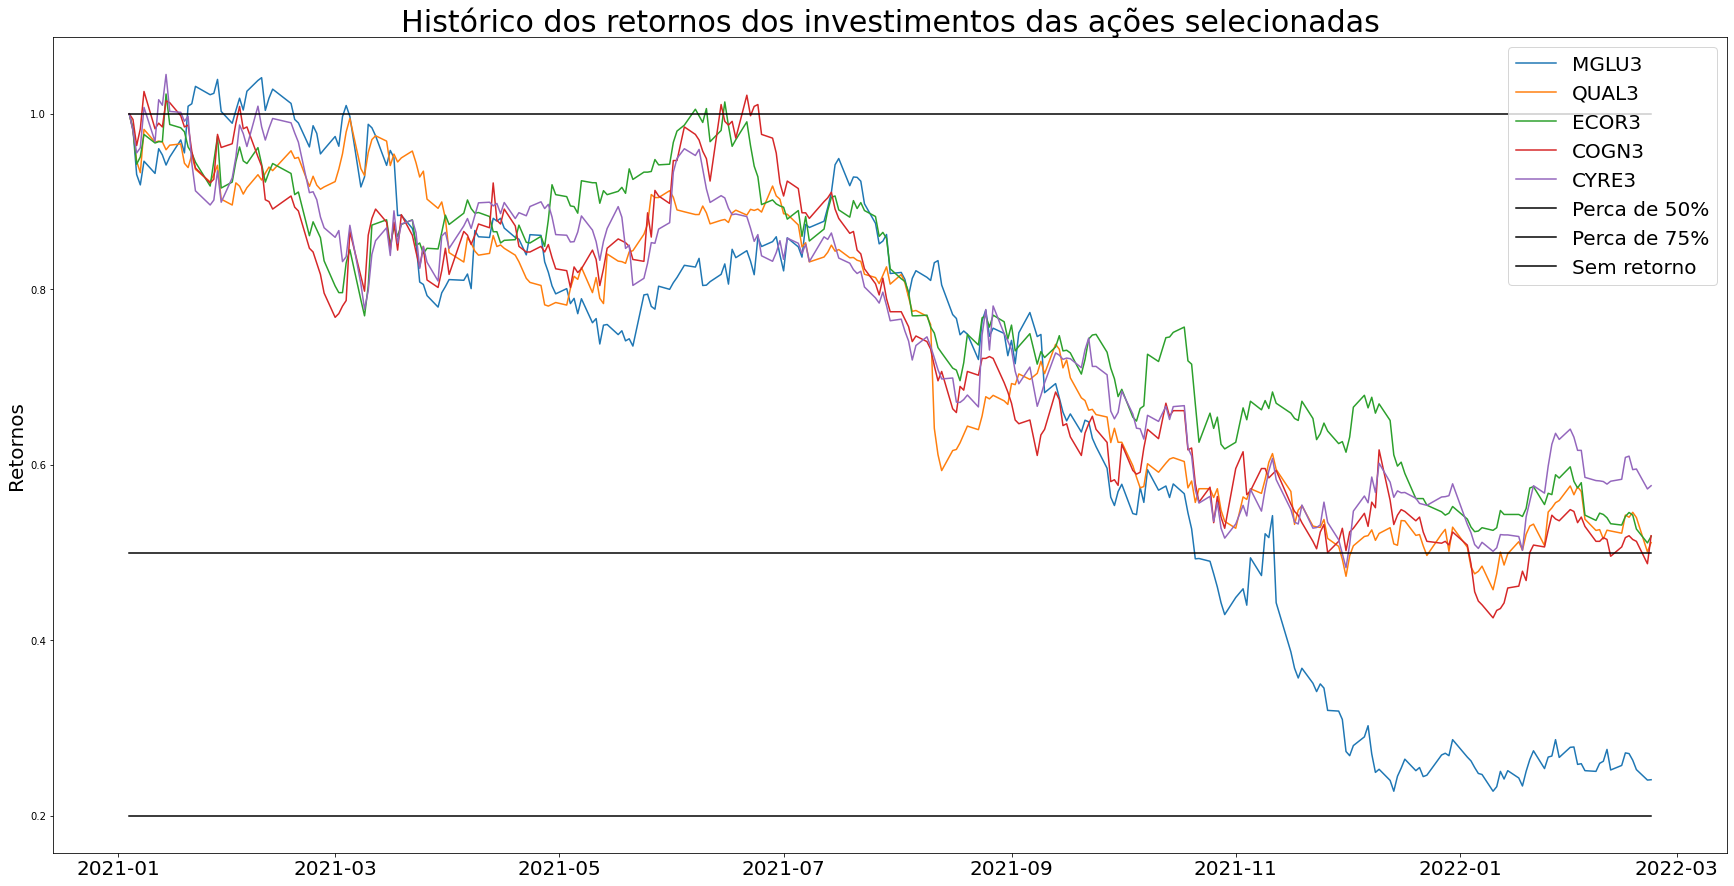

In [89]:
#Plotando os retornos dos investimentos das ações selecionadas
plt.figure(figsize=(30, 15))
plt.plot(acoes_normalizado2.index, acoes_normalizado2['MGLU3.SA'], label='MGLU3')  # Plot some data on the (implicit) axes.
plt.plot(acoes_normalizado2.index, acoes_normalizado2['QUAL3.SA'], label='QUAL3')   # etc.
plt.plot(acoes_normalizado2.index, acoes_normalizado2['ECOR3.SA'], label='ECOR3') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['COGN3.SA'], label='COGN3') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['CYRE3.SA'], label='CYRE3') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['50%'], label='Perca de 50%', color = 'black') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['20%'], label='Perca de 75%', color = 'black') 
plt.plot(acoes_normalizado2.index, acoes_normalizado2['0%'], label='Sem retorno', color = 'black')
#plt.xlabel('Data', fontsize=20)
plt.ylabel('Retornos', fontsize=20)
plt.xticks(fontsize = 20)
plt.title("Histórico dos retornos dos investimentos das ações selecionadas", fontsize=30)
plt.legend(fontsize=20);

Para o gráfico acima foi utilizado três linhas de referência, a linha superior indica um retorno de 0% no valor investido. A linha no centro do gráfico indica uma perca de 50% no valor do investimento e a linha inferior indica uma perca de 80% no valor investido

Quando analisamos séries temporais devemos observar as variações no longo e no curto prazo, assim podemos selecionar as melhores ações para o tipo de estratégia de investimento utilizada.
Aqui a nossa proposa é apresentar uma breve apresentação gráfica dos melhores e piores investimentos levando em consideração os últimos 7 anos e também o último ano.